<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [7]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [8]:
# 1. Install pandas if needed
# !pip install pandas

# 2. Import required libraries
import pandas as pd
import os

# 3. Download the file (if not already present)
if 'survey-data.csv' not in os.listdir():
    !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# 4. Read the file
try:
    df = pd.read_csv('survey-data.csv')
    print("File loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print("File not found. Please check:")
    print(f"Current directory: {os.getcwd()}")
    print(f"Files present: {os.listdir()}")

File not found. Please check:
Current directory: c:\Users\rahim\Downloads
Files present: ['!qhlogs.doc', '(Optional) Hands-on Lab Create IBM Cloud account and watsonx.ai instance.pdf', '.2.1.jpg', '.2.jpg', '00608ac9e1c67d224121deb8b7eb3b33.jpg', '01-upscaled-scale-2_00x.png', '0261549001741619090IMG202301.jpg', '05cd258f32814d7ea174c489bbf0760526f7a095b25eb6fa625c5e73c7949251db99686a6585244e7c3fd3094c9b287ddc93bcac18d1416d8943bc595967be7c_EDGPM4577M_08DPS8U2707_081601.pdf', '1-s2.0-S0014305722003500-main.pdf', '1-s2.0-S2238785419302923-main.pdf', '1-s2.0-S2666053921000369-main.pdf', '1-s2.0-S2666831921000023-main.pdf', '1.1.jpg', '1.2.jpg', '1.jpg', '10.1002@adma.201806328.pdf', '10.1002@elan.201900062.pdf', '10.1002@mabi.202000228.pdf', '10.1007@s10854-020-04577-z.pdf', '10.1007_s00216-005-3255-8-citation.ris', '10.1007_s00604-022-05204-w-citation.ris', '10.1016@0731-70858880085-2.pdf', '10.1016@j.apsusc.2018.07.144.pdf', '10.1016@j.jelechem.2020.114400.pdf', '10.1016@j.microc.2020.1

'wget' is not recognized as an internal or external command,
operable program or batch file.


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [15]:
# Alternative version that doesn't try to remove existing database
try:
    # Connect to database (will create if doesn't exist)
    conn = sqlite3.connect(db_path)
    
    # Write data (will replace existing table)
    df.to_sql('main', conn, if_exists='replace', index=False)
    
    # Rest of your code...
finally:
    conn.close()

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [16]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define a simple query to fetch a few rows
query = "SELECT * FROM main LIMIT 5"

# Execute the query and load the result into a DataFrame
df_check = pd.read_sql_query(query, conn)

# Display the result
print(df_check)

# Optional: Close the connection
conn.close()

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [17]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the query
query = "SELECT COUNT(*) AS total_rows FROM main"

# Run the query
df_count = pd.read_sql_query(query, conn)

# Display the result
print(df_count)

# Optional: Close the connection
conn.close()

   total_rows
0       65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [18]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to list all tables
query = "SELECT name FROM sqlite_master WHERE type='table'"

# Execute the query
df_tables = pd.read_sql_query(query, conn)

# Display the result
print(df_tables)

# Optional: Close the connection
conn.close()

   name
0  main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [19]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to group by Age and count entries
query = """
SELECT Age, COUNT(*) AS count
FROM main
GROUP BY Age
ORDER BY Age
"""

# Execute the query and load into a DataFrame
df_grouped = pd.read_sql_query(query, conn)

# Display the results
print(df_grouped)

# Optional: Close the connection
conn.close()

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [20]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL command to describe the 'main' table
query = "PRAGMA table_info(main)"

# Run the query
df_schema = pd.read_sql_query(query, conn)

# Display the schema
print(df_schema)

# Optional: Close the connection
conn.close()

     cid                 name     type  notnull dflt_value  pk
0      0           ResponseId  INTEGER        0       None   0
1      1           MainBranch     TEXT        0       None   0
2      2                  Age     TEXT        0       None   0
3      3           Employment     TEXT        0       None   0
4      4           RemoteWork     TEXT        0       None   0
..   ...                  ...      ...      ...        ...  ..
109  109      JobSatPoints_11     REAL        0       None   0
110  110         SurveyLength     TEXT        0       None   0
111  111           SurveyEase     TEXT        0       None   0
112  112  ConvertedCompYearly     REAL        0       None   0
113  113               JobSat     REAL        0       None   0

[114 rows x 6 columns]


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


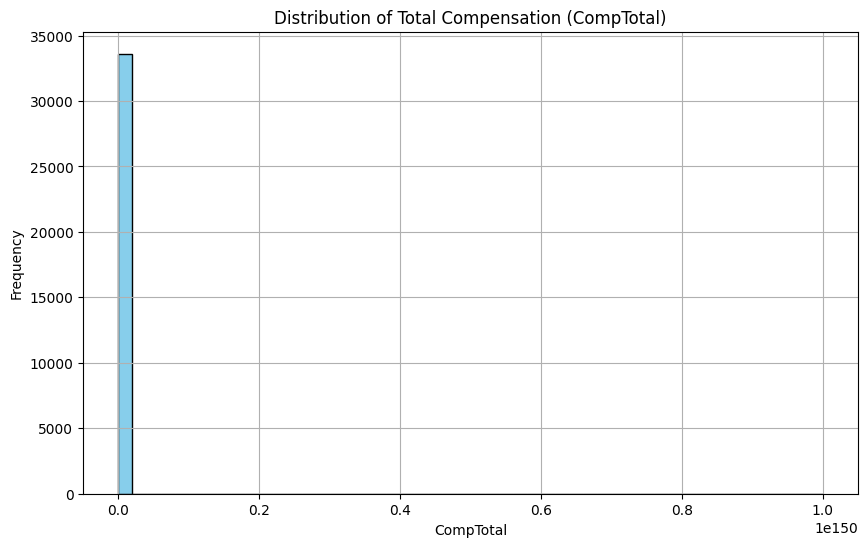

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data again if needed
df = pd.read_csv('survey-data.csv')

# Drop missing or zero values from CompTotal for a cleaner plot
df_filtered = df[df['CompTotal'].notnull() & (df['CompTotal'] > 0)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Box Plots**

Plot a box plot of Age.


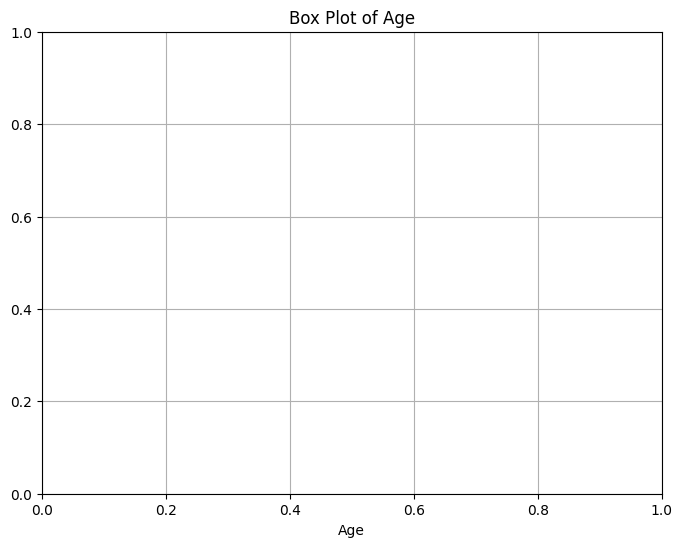

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('survey-data.csv')

# Convert 'Age' to numeric, force invalid values to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Filter out missing or invalid ages
df_age = df[df['Age'].notnull() & (df['Age'] > 0)]

# Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_age['Age'], color='lightgreen')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


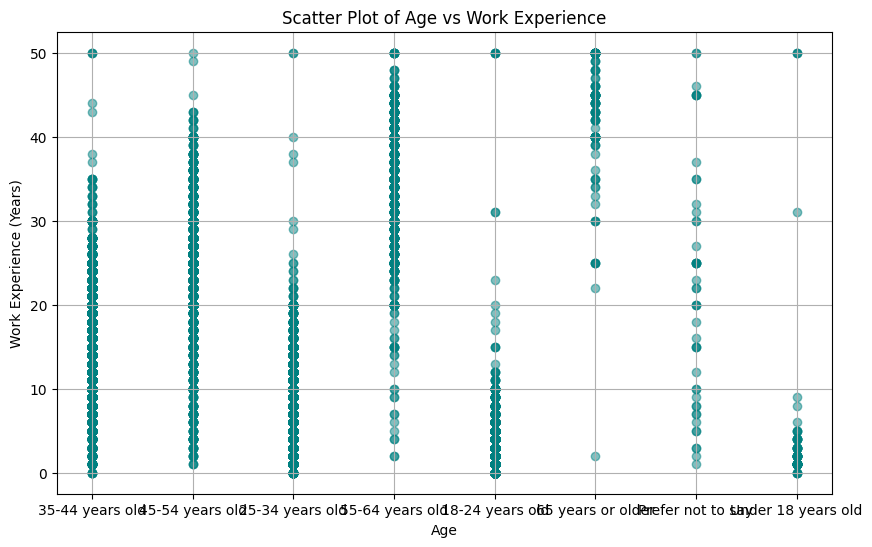

In [24]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query Age and WorkExp columns
query = "SELECT Age, WorkExp FROM main WHERE Age IS NOT NULL AND WorkExp IS NOT NULL"
df_scatter = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['Age'], df_scatter['WorkExp'], alpha=0.5, color='teal')
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


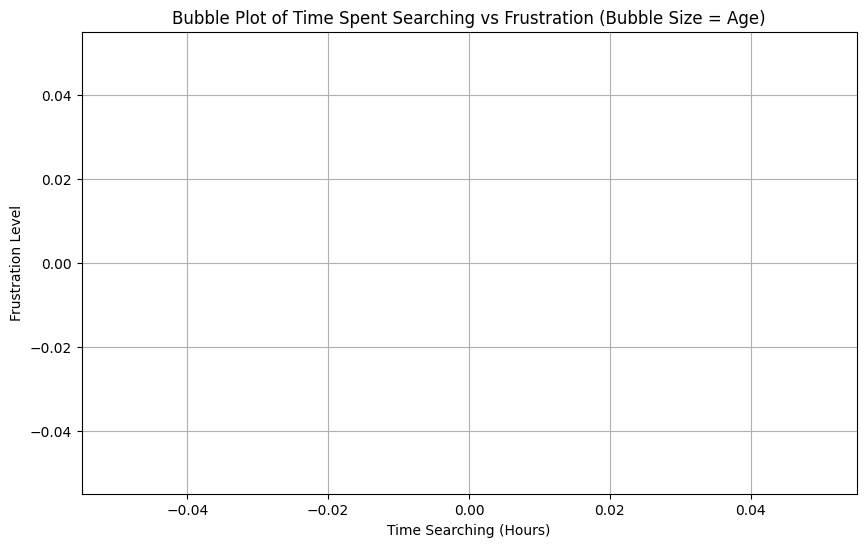

In [26]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# Query the necessary data
query = """
SELECT TimeSearching, Frustration, Age
FROM main
WHERE TimeSearching IS NOT NULL AND Frustration IS NOT NULL AND Age IS NOT NULL
"""
df_bubble = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Convert columns to numeric just in case
df_bubble['TimeSearching'] = pd.to_numeric(df_bubble['TimeSearching'], errors='coerce')
df_bubble['Frustration'] = pd.to_numeric(df_bubble['Frustration'], errors='coerce')
df_bubble['Age'] = pd.to_numeric(df_bubble['Age'], errors='coerce')

# Drop any rows that still have NaNs
df_bubble.dropna(inplace=True)

# Ensure bubble size is positive and scaled
bubble_sizes = df_bubble['Age'].abs() * 3  # Optional: adjust scale

# Create bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df_bubble['TimeSearching'], df_bubble['Frustration'],
            s=bubble_sizes,
            alpha=0.5, color='purple', edgecolors='w')

plt.title('Bubble Plot of Time Spent Searching vs Frustration (Bubble Size = Age)')
plt.xlabel('Time Searching (Hours)')
plt.ylabel('Frustration Level')
plt.grid(True)
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


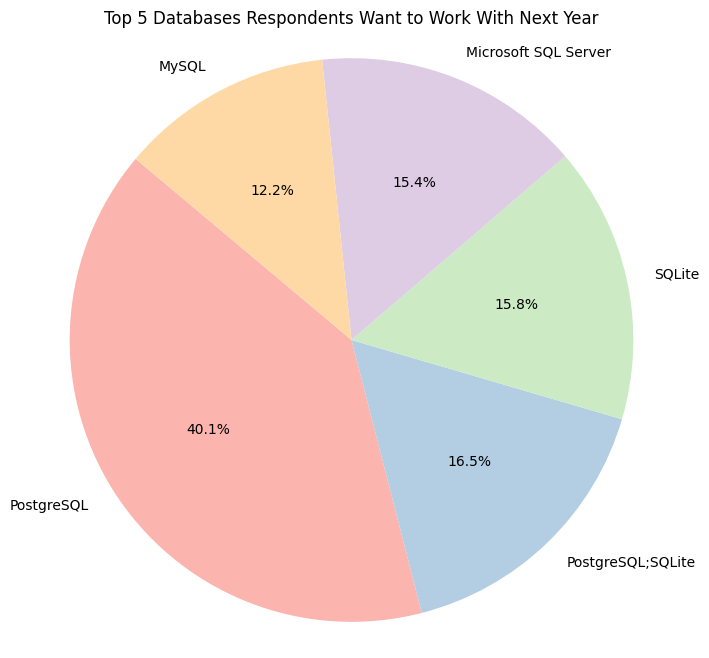

In [27]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query the column
query = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df_db = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Split comma-separated values and count each database
db_counts = (
    df_db['DatabaseWantToWorkWith']
    .str.split(',')  # split string by comma
    .explode()       # flatten the lists into rows
    .str.strip()     # remove extra spaces
    .value_counts()  # count each unique value
)

# Take top 5 databases
top5 = db_counts.head(5)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.axis('equal')  # Equal aspect ratio ensures a circle
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


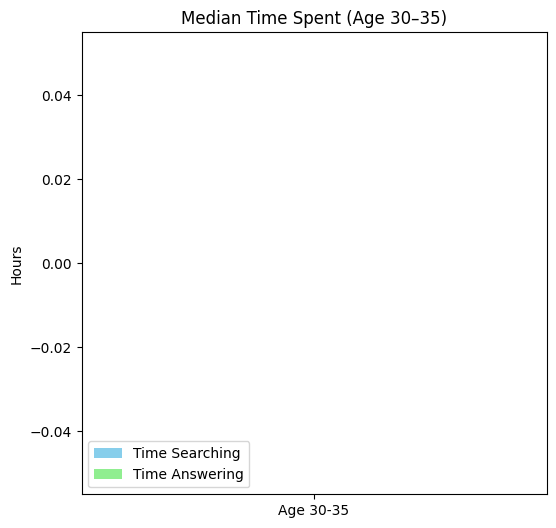

In [28]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query the necessary columns for the age range
query = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age BETWEEN 30 AND 35
AND TimeSearching IS NOT NULL AND TimeAnswering IS NOT NULL
"""
df_stack = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Convert to numeric (in case they are strings)
df_stack['TimeSearching'] = pd.to_numeric(df_stack['TimeSearching'], errors='coerce')
df_stack['TimeAnswering'] = pd.to_numeric(df_stack['TimeAnswering'], errors='coerce')

# Drop NaNs
df_stack.dropna(inplace=True)

# Calculate median values
median_searching = df_stack['TimeSearching'].median()
median_answering = df_stack['TimeAnswering'].median()

# Plotting
labels = ['Age 30-35']
searching_vals = [median_searching]
answering_vals = [median_answering]

plt.figure(figsize=(6, 6))
plt.bar(labels, searching_vals, label='Time Searching', color='skyblue')
plt.bar(labels, answering_vals, bottom=searching_vals, label='Time Answering', color='lightgreen')

plt.title('Median Time Spent (Age 30–35)')
plt.ylabel('Hours')
plt.legend()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


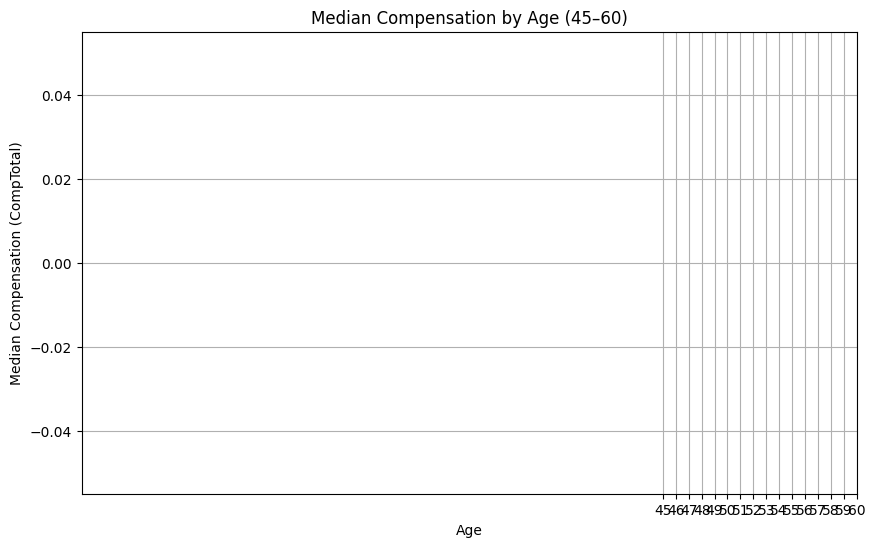

In [29]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# Query age and compensation data
query = """
SELECT Age, CompTotal
FROM main
WHERE Age BETWEEN 45 AND 60 AND CompTotal IS NOT NULL
"""
df_line = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Convert to numeric (if necessary)
df_line['Age'] = pd.to_numeric(df_line['Age'], errors='coerce')
df_line['CompTotal'] = pd.to_numeric(df_line['CompTotal'], errors='coerce')

# Drop NaNs
df_line.dropna(inplace=True)

# Group by age and calculate median compensation
median_comp_by_age = df_line.groupby('Age')['CompTotal'].median()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age.index, median_comp_by_age.values, marker='o', color='dodgerblue')
plt.title('Median Compensation by Age (45–60)')
plt.xlabel('Age')
plt.ylabel('Median Compensation (CompTotal)')
plt.grid(True)
plt.xticks(range(45, 61))
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


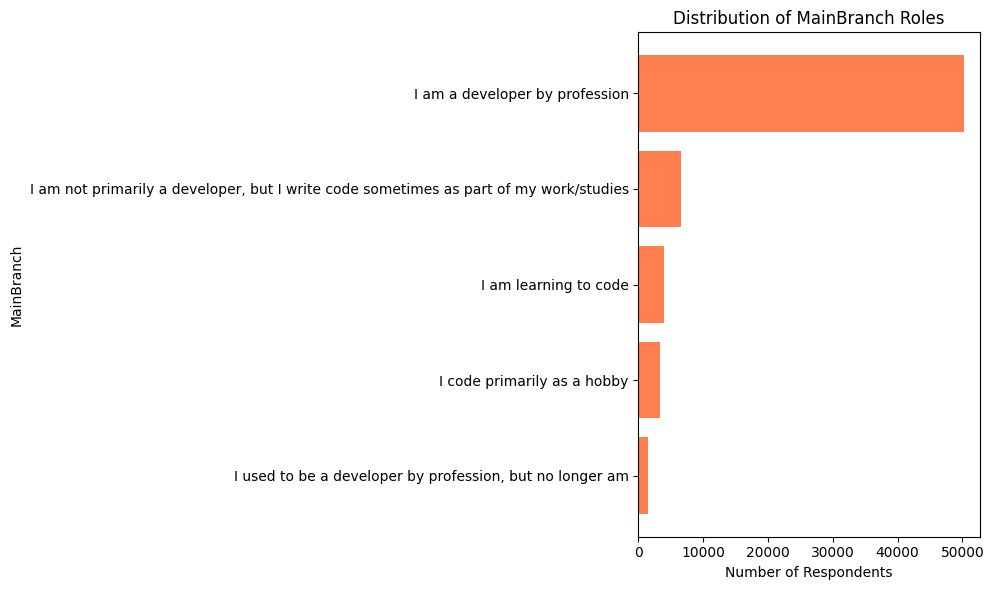

In [30]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query MainBranch data
query = "SELECT MainBranch FROM main WHERE MainBranch IS NOT NULL"
df_branch = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Count frequencies
branch_counts = df_branch['MainBranch'].value_counts().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(branch_counts.index, branch_counts.values, color='coral')
plt.title('Distribution of MainBranch Roles')
plt.xlabel('Number of Respondents')
plt.ylabel('MainBranch')
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [3]:
import sqlite3
conn = sqlite3.connect('survey-data.sqlite')
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
